　2章のパーセプトロンとADALINEの説明用のノートです。  
　以下の図にあるように、A(0,0),B(1,0),C(0,1),D(1,1)の４点をパーセプトロンとADALINEにより分類を行ってみて、両アルゴリズムがどのように動くのか理解することを目的とします。

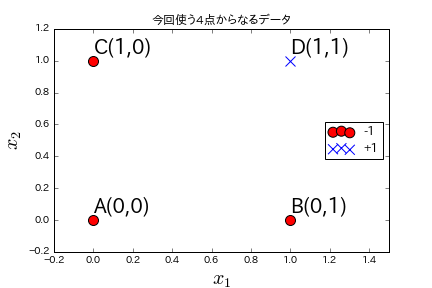

In [3]:
Image(filename='./img/01_4point.png', width=500) 

## 関数の定義

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pandas as pd
# import scipy
#import seaborn as sns 今回はやめておく
#sns.set_context('paper')
#sns.set_style('whitegrid')
# import random
%matplotlib inline
from IPython.display import Image

In [2]:
plt.rcParams['font.family'] = 'IPAPGothic' # 通常必要なし
plt.rcParams['font.size'] = 14

In [228]:
%matplotlib nbagg

# パーセプトロン

- ２値分類タスク
    - 1(陽性クラス)
    - -1(陰性クラス)
- 総入力$z = w_0x_0 + w_1x_1 + ... + x_mx_m$
- 活性化関数$\phi(z) = 1(z \ge0) , -1 (z <0)$
    - 単位ステップ関数、ヘビサイド関数(Heaviside step function)


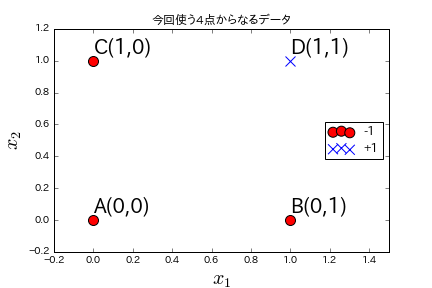

In [4]:

Image(filename='./img/01_4point.png', width=500) 

In [100]:
# Xは入力、yは正解ラベル
X = np.array([[0,0],[1,0],[0,1],[1,1]])
y = [-1, -1, -1, 1]

各点での入力は$x_1とx_2$の２つであり、総入力zと活性化関数$\phi(z)$は以下のように表すことができる。

これは、$x_0=1, 初期値はw_0 = w_1 = w_2 = 0$なので

$$z = w_0 + w_1x_1 + w_2x_2 = \mathbf{w}^{\mathrm{T}}\mathbf{x} ~~~ and ~~~  
$$

$$\phi(z) = 1 (z \ge0) \\
~~~~~~~~-1 (z <0)$$

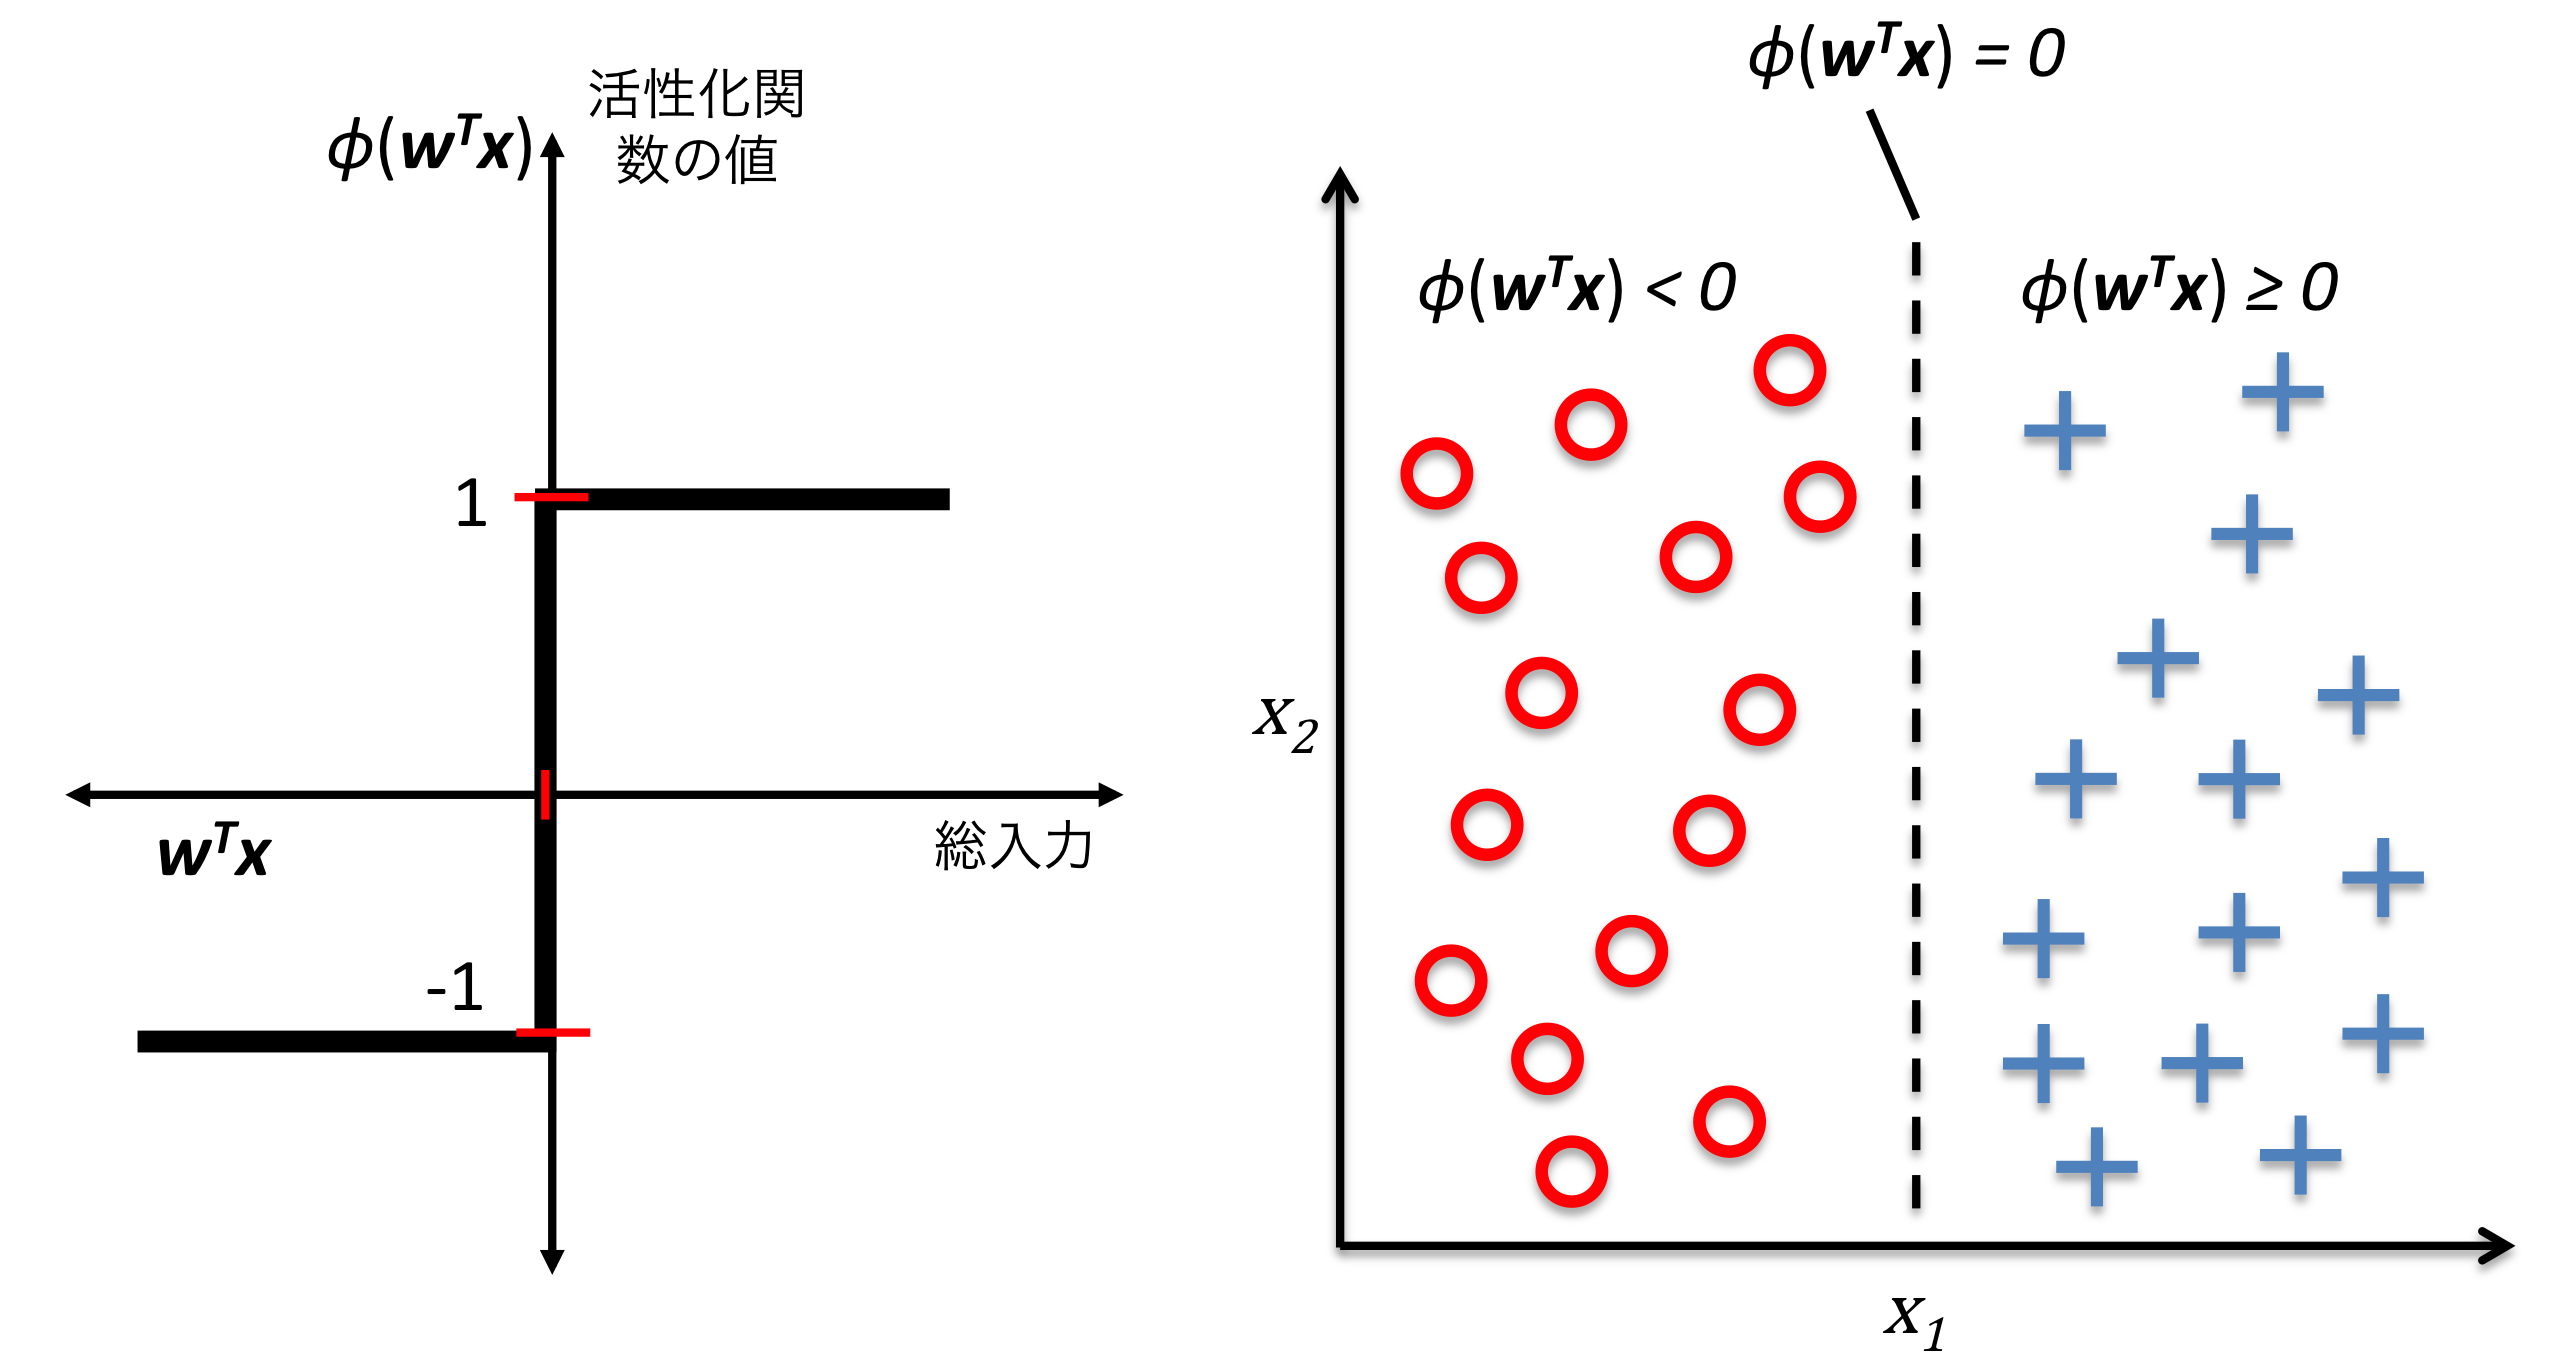

In [14]:
Image(filename='./img/02_02.png', width=500) 

総入力(net inpur)が0以上であれば１、1以下であれば-1
Xが2次元で線形分離可能な時は、右図のように$\phi(z) \ge 0$と$\phi(z)<0$　で分離できることを右図は表している


## Rosenblattによるパーセプトロンの初期の学習規則
1. 重みを0または値の小さい乱数で初期化
2. トレーニングサンプルX^(i)ごとに以下の手順を実行
    1. 出力値 $\hat y$を計算
    2. 重みを更新する

詳細はP21参照  
以下では点A、点B、点C、点Dの４点について、パーセプトロンで学習がどのように進むか手計算してみます。
その後、グラフを描いて見ます。

### 手計算

#### epoch1

$w_0 = 0, w_1 = 0 , w_2 = 0$

$z = 0 +0x_1 +0x_2$

##### 点A(0,0)

$z = 0 +0x_1 +0x_2 = 0$  
$y^{(A)} = -1, ~~ \hat y^{(A)} = 1$  
$\Delta w_0 = eta(y^{(A)} - \hat y^{(A)})~~~~~~~ = 0.01(-1-1)~~~~~~ = -0.02$  
$\Delta w_1 = eta(y^{(A)} - \hat y^{(A)})~x_1^{(A)} = 0.01(-1-1)*0=0$  
$\Delta w_2 = eta(y^{(A)} - \hat y^{(A)})~x_2^{(A)}= 0.01(-1-1)*0=0$  
$w_0 = -0.02 ,w_1 = 0 , w_2 = 0$

##### 点B(1,0)

$z = -0.02 +0x_1 +0x_2 = -0.02$  
$y^{(B)} = -1, ~~ \hat y^{(B)} = -1$  
$\Delta w_0 = eta(y^{(B)} - \hat y^{(B)})~~~~~~~ = 0.01(-1+1)~~~~~~ = 0$  
$\Delta w_1 = eta(y^{(B)} - \hat y^{(B)})~x_1^{(A)} = 0.01(-1+1)*1=0$  
$\Delta w_2 = eta(y^{(B)} - \hat y^{(B)})~x_2^{(A)}= 0.01(-1+1)*0=0$  
$w_0 = -0.02 ,w_1 = 0 , w_2 = 0$

##### 点C(0,1)

$z = -0.02 +0x_1 +0x_2 = -0.02$  
$y^{(C)} = -1, ~~ \hat y^{(C)} = -1$    
$\Delta w_0 = eta(y^{(C)} - \hat y^{(C)})~~~~~~~ = 0.01(-1+1)~~~~~~ = 0$  
$\Delta w_1 = eta(y^{(C)} - \hat y^{(C)})~x_1^{(A)} = 0.01(-1+1)*0=0$  
$\Delta w_2 = eta(y^{(C)} - \hat y^{(C)})~x_2^{(A)}= 0.01(-1+1)*1=0$  
$w_0 = -0.02 ,w_1 = 0 , w_2 = 0$

##### 点D(1,1)

$z = -0.02 +0x_1 +0x_2 = -0.02$  
$y^{(D)} = 1, ~~ \hat y^{(D)} = -1$  
$\Delta w_0 = eta(y^{(D)} - \hat y^{(D)})~~~~~~~ = 0.01(1+1)~~~~~~ = 0.02$  
$\Delta w_1 = eta(y^{(D)} - \hat y^{(D)})~x_1^{(A)} = 0.01(1+1)*1=0.02$  
$\Delta w_2 = eta(y^{(D)} - \hat y^{(D)})~x_2^{(A)}= 0.01(1+1)*1=0.02$
$w_0 = 0 ,w_1 = 0.02 , w_2 = 0.02$

#### epoch2

##### 点A(0,0)

$z = 0 +0.02x_1 +0.02x_2 = 0$  
$y^{(A)} = -1, ~~ \hat y^{(A)} = 1$  
$\Delta w_0 = eta(y^{(A)} - \hat y^{(A)})~~~~~~~ = 0.01(-1-1)~~~~~~ = -0.02$  
$\Delta w_1 = eta(y^{(A)} - \hat y^{(A)})~x_1^{(A)} = 0.01(-1-1)*0=0$  
$\Delta w_2 = eta(y^{(A)} - \hat y^{(A)})~x_2^{(A)}= 0.01(-1-1)*0=0$  
$w_0 = -0.02 ,w_1 = 0.02 , w_2 = 0.02$

##### 点B(1,0)

$z = -0.02 +0.02x_1 +0.02x_2 = 0$  
$y^{(B)} = -1, ~~ \hat y^{(B)} = 1$  
$\Delta w_0 = eta(y^{(B)} - \hat y^{(B)})~~~~~~~ = 0.01(-1-1)~~~~~~ = -0.02$  
$\Delta w_1 = eta(y^{(B)} - \hat y^{(B)})~x_1^{(A)} = 0.01(-1-1)*1=-0.02$  
$\Delta w_2 = eta(y^{(B)} - \hat y^{(B)})~x_2^{(A)}= 0.01(-1-1)*0=0$
$w_0 = -0.04 ,w_1 = 0 , w_2 = 0.02$

##### 点C(0,1)

$z = -0.04 +0x_1 +0.02x_2 = -0.02$  
$y^{(C)} = -1, ~~ \hat y^{(C)} = -1$    
$\Delta w_0 = \Delta w_1 = \Delta w_2 = 0$  
$w_0 = -0.04 ,w_1 = 0 , w_2 = 0.02$

##### 点D(1,1)

$z = -0.04 +0x_1 +0.02x_2 = -0.02$  
$y^{(D)} = 1, ~~ \hat y^{(D)} = -1$  
$\Delta w_0 = eta(y^{(D)} - \hat y^{(D)})~~~~~~~ = 0.01(1+1)~~~~~~ = 0.02$  
$\Delta w_1 = eta(y^{(D)} - \hat y^{(D)})~x_1^{(A)} = 0.01(1+1)*1=0.02$  
$\Delta w_2 = eta(y^{(D)} - \hat y^{(D)})~x_2^{(A)}= 0.01(1+1)*1=0.02$
$w_0 = -0.02 , w_1 = 0.02 , w_2 = 0.04x_2$

#### epoch3

##### 点A(0,0)

$z = -0.02 +0.02x_1 +0.02x_2 = -0.02$  
$y^{(A)} = -1, ~~ \hat y^{(A)} = -1$  
$\Delta w_0 = \Delta w_1 = \Delta w_2 = 0$  
$w_0 = -0.02 , w_1 = 0.02 , w_2 = 0.04x_2$

##### 点B(1,0)

$z = -0.02 +0.02x_1 +0.04x_2 = 0$  
$y^{(B)} = -1, ~~ \hat y^{(B)} = 1$  
$\Delta w_0 = eta(y^{(B)} - \hat y^{(B)})~~~~~~~ = 0.01(-1-1)~~~~~~ = -0.02$  
$\Delta w_1 = eta(y^{(B)} - \hat y^{(B)})~x_1^{(A)} = 0.01(-1-1)*1=-0.02$  
$\Delta w_2 = eta(y^{(B)} - \hat y^{(B)})~x_2^{(A)}= 0.01(-1-1)*1=-0.02$
$w_0=-0.04, w_1=0, w_2 = 0.04$

##### 点C(0,1)

$z = -0.04 +0x_1 +0.04x_2 = 0$  
$y^{(C)} = -1, ~~ \hat y^{(C)} = 1$    
$\Delta w_0 = eta(y^{(C)} - \hat y^{(C)})~~~~~~~ = 0.01(-1-1)~~~~~~ = -0.02$  
$\Delta w_1 = eta(y^{(C)} - \hat y^{(C)})~x_1^{(A)} = 0.01(-1-1)*0=0$  
$\Delta w_2 = eta(y^{(C)} - \hat y^{(C)})~x_2^{(A)}= 0.01(-1-1)*1=-0.02$
$w_0 =  -0.06 , w_1 = 0 , w_2 = 0.02$

##### 点D(1,1)

$z = -0.06 +0x_1 +0.02x_2 = -0.04$  
$y^{(D)} = 1, ~~ \hat y^{(D)} = -1$  
$\Delta w_0 = eta(y^{(D)} - \hat y^{(D)})~~~~~~~ = 0.01(1+1)~~~~~~ = 0.02$  
$\Delta w_1 = eta(y^{(D)} - \hat y^{(D)})~x_1^{(A)} = 0.01(1+1)*1=0.02$  
$\Delta w_2 = eta(y^{(D)} - \hat y^{(D)})~x_2^{(A)}= 0.01(1+1)*1=0.02$
$w_0 =  -0.04 w_1 = 0.02 ,w_2 = 0.04$

## Pythonでやってみる

### webのコード

In [199]:
# https://thinkit.co.jp/article/10342?page=0%2C1

eta = 0.01  # 学習率
n_iter = 10  # トレーニングデータのトレーニング回数
w0 = w1 = w2 = 0  # 重みを初期化
w0_, w1_, w2_ = [], [] ,[]  # 重みを格納するリスト
errors_ = []  # 誤差を格納するリスト

for epoch in range(n_iter):  # トレーニング回数分トレーニングデータを反復
    errors = 0
    
    for xi, target in zip(X, y):  # 各サンプルで重みを更新
    # 総入力の計算
        net_input = w0 + w1 * xi[0] + w2 * xi[1]

        # 総入力が0以上の場合は1、0未満の場合は-1と予測
        pred = np.where(net_input >= 0.0, 1, -1)

        # 重みを更新
        update = eta * (target - pred)
        w1 += update * xi[0]
        w2 += update * xi[1]
        w0 += update

        # 誤差を算出
        errors += int(update != 0.0)
    
    # 重みを格納
    w0_.append(w0)
    w1_.append(w1)
    w2_.append(w2)
    
    # 誤差を格納
    errors_.append(errors)

<IPython.core.display.Javascript object>


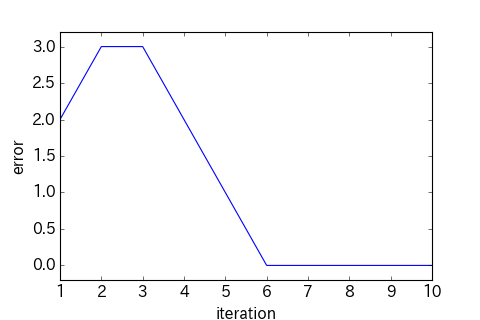

In [201]:
# 各反復での誤差をプロット
iters = range(1, n_iter+1)
plt.plot(iters, errors_)
plt.xlabel('iteration')
plt.ylabel('error')
plt.ylim(-0.2,3.2)
plt.show()

<IPython.core.display.Javascript object>


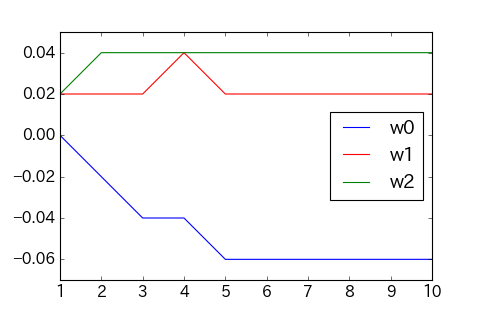

In [206]:
# 重み w0、w1、w2の変化をプロット
plt.plot(iters, w0_, c='blue', label='w0')
plt.plot(iters, w1_, c='red', label='w1')
plt.plot(iters, w2_, c='green', label='w2')
plt.legend(loc='best')
plt.ylim(-0.07,0.05)
plt.show()


### 文字を出力するコード

In [ ]:
eta = 0.01  # 学習率
n_iter = 10  # トレーニングデータのトレーニング回数
w0 = w1 = w2 = 0  # 重みを初期化
w0_, w1_, w2_ = [], [] ,[]  # 重みを格納するリスト
errors_ = []  # 誤差を格納するリスト

for epoch in range(n_iter):  # トレーニング回数分トレーニングデータを反復
    errors = 0
    print("--------epoch{}-----------".format(epoch+1))
    for xi, target in zip(X, y):  # 各サンプルで重みを更新
    # 総入力の計算
        #net_input = w0 + w1 * xi[0] + w2 * xi[1]
        net_input = round(w0 + w1 * xi[0] + w2 * xi[1], 3)
        print("{}について更新。net_input　は {}".format(xi,net_input))
        
        # 総入力が0以上の場合は1、0未満の場合は-1と予測
        pred = np.where(net_input >= 0.0, 1, -1)
        print("真のラベルは{}予測は {}".format(target,pred))
        # 重みを更新
        update = eta * (target - pred)
        w1 += update * xi[0]
        w2 += update * xi[1]
        w0 += update
        print('update =', update)
        
        #w1 = round(w1 + update * xi[0] , 4)
        #w2 = round(w2 + update * xi[1] , 4)
        #w0 = round(w0 + update , 4)
        print("重みは、w0は{}、w1は{}、w2は{}となりました".format(w0,w1,w2))
        print()
        # 誤差を算出
        errors += int(update != 0.0)
    
    # 重みを格納
    w0_.append(w0)
    w1_.append(w1)
    w2_.append(w2)
    
    # 誤差を格納
    errors_.append(errors)

### アニメーションのコード

In [ ]:
eta = 0.01  # 学習率
n_iter = 10  # トレーニングデータのトレーニング回数
w0 = w1 = w2 = 0  # 重みを初期化
w0_, w1_, w2_ = [], [] ,[]  # 重みを格納するリスト
errors_ = []  # 誤差を格納するリスト
ims = []
x = np.arange(-1.0,3.0,0.01)
fig, ax = plt.subplots()
points = ['A','B','C','D']

for epoch in range(n_iter):  # トレーニング回数分トレーニングデータを反復
    errors = 0
    
    for (i, xi), target in zip(enumerate(X), y):  # 各サンプルで重みを更新
    # 総入力の計算
        net_input = round(w0 + w1 * xi[0] + w2 * xi[1],2)

        # 総入力が0以上の場合は1、0未満の場合は-1と予測
        pred = np.where(net_input >= 0.0, 1, -1)
                
        # 重みを更新
        update = eta * (target - pred)

        # アニメーションを描く
        alpha = -w1/w2 if w2 != 0 else 10**5
        beta = - w0/w2 if w2 != 0 else 10**5
        y_ = alpha*x
        im, = plt.plot(x,y_ + beta)
        ax.set_ylim(-0.5, 3.5)
        ax.set_xlim(-1, 3)
        plt.scatter(X[:3, 0], X[:3,1], c="red" , marker='o', label='-1', s = 50)
        plt.scatter(X[3, 0], X[3,1], c="blue" , marker='x', label='+1', s = 50)
        ann1 = ax.annotate("エポック{},サンプル{}({},{})".format(epoch + 1, points[i], X[i][0],X[i][1]),(-0.5,3.0), fontsize = 15) 
        ann2 = ax.annotate("w0={},w1={},w2={} ⇒ z ={}".format(round(w0,3),round(w1,3),round(w2,3),round(net_input,3)),(-0.5,2.5), fontsize =15)
        ann3 = ax.annotate("$\phi (z) = ${}傾き： {}、切片 {}".format(pred, round(alpha,3) ,round(beta,3)),(-0.5,2.0), fontsize = 15) 
        
        w1 += update * xi[0]
        w2 += update * xi[1]
        w0 += update
        ann4 = ax.annotate("$\Delta w_0={},\Delta w_1={},\Delta w_2={}$".format(update,update*xi[0],update*xi[1]),(-0.5,1.5),fontsize=15)

        ims.append([im,ann1, ann2, ann3, ann4])        

        # 誤差を算出
        errors += int(update != 0.0)
    
    # 重みを格納
    w0_.append(w0)
    w1_.append(w1)
    w2_.append(w2)
    
    # 誤差を格納
    errors_.append(errors)
    

ani = animation.ArtistAnimation(fig, ims, interval=500)
# ani.save("test1.gif", writer = 'imagemagick')

<img src = "./img/per.gif">

## irisもやってみる

In [214]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/' \
        'iris.data', header=None)

In [215]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [216]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

In [217]:
# 品種setosaのプロット(赤の○)
plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
# 品種versicolorのプロット(青の×)
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='x', label='versicolor')
# 軸のラベルの設定
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
# 凡例の設定(左上に配置)
plt.legend(loc='upper left')
# 図の表示
plt.show()

### webのコード

In [218]:
eta = 0.01  # 学習率
n_iter = 10  # トレーニングデータのトレーニング回数
w0 = w1 = w2 = 0.01  # 重みを初期化
w0_, w1_, w2_ = [], [] ,[]  # 重みを格納するリスト
errors_ = []  # 誤差を格納するリスト

for epoch in range(n_iter):  # トレーニング回数分トレーニングデータを反復
    errors = 0
    
    for xi, target in zip(X, y):  # 各サンプルで重みを更新
    # 総入力の計算
        net_input = w0 + w1 * xi[0] + w2 * xi[1]

        # 総入力が0以上の場合は1、0未満の場合は-1と予測
        pred = np.where(net_input >= 0.0, 1, -1)

        # 重みを更新
        update = eta * (target - pred)
        w1 += update * xi[0]
        w2 += update * xi[1]
        w0 += update

        # 誤差を算出
        errors += int(update != 0.0)
    
    # 重みを格納
    w0_.append(w0)
    w1_.append(w1)
    w2_.append(w2)
    
    # 誤差を格納
    errors_.append(errors)

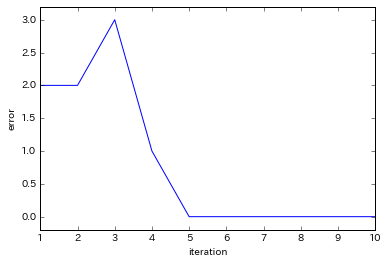

In [222]:
# 各反復での誤差をプロット
iters = range(1, n_iter+1)
plt.plot(iters, errors_)
plt.xlabel('iteration')
plt.ylabel('error')
plt.ylim(-0.2,3.2)
plt.show()

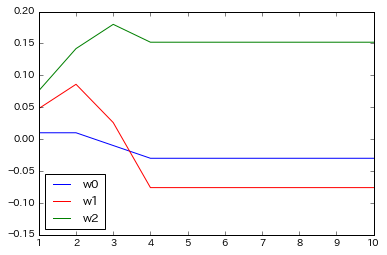

In [225]:
# 重み w0、w1、w2の変化をプロット
plt.plot(iters, w0_, c='blue', label='w0')
plt.plot(iters, w1_, c='red', label='w1')
plt.plot(iters, w2_, c='green', label='w2')
plt.legend(loc='best')
plt.ylim(-0.15,0.2)
plt.show()


### 文字を出力するコード

In [ ]:
eta = 0.01  # 学習率
n_iter = 10  # トレーニングデータのトレーニング回数
w0 = w1 = w2 = 0.01  # 重みを初期化
w0_, w1_, w2_ = [], [] ,[]  # 重みを格納するリスト
errors_ = []  # 誤差を格納するリスト

for epoch in range(n_iter):  # トレーニング回数分トレーニングデータを反復
    errors = 0
    print("--------epoch{}-----------".format(epoch+1))
    for xi, target in zip(X, y):  # 各サンプルで重みを更新
    # 総入力の計算
        #net_input = w0 + w1 * xi[0] + w2 * xi[1]
        net_input = round(w0 + w1 * xi[0] + w2 * xi[1], 3)
        print("{}について更新。net_input　は {}".format(xi,net_input))
        
        # 総入力が0以上の場合は1、0未満の場合は-1と予測
        pred = np.where(net_input >= 0.0, 1, -1)
        print("真のラベルは{}予測は {}".format(target,pred))
        # 重みを更新
        update = eta * (target - pred)
        w1 += update * xi[0]
        w2 += update * xi[1]
        w0 += update
        print('update =', update)
        
        #w1 = round(w1 + update * xi[0] , 4)
        #w2 = round(w2 + update * xi[1] , 4)
        #w0 = round(w0 + update , 4)
        print("重みは、w0は{}、w1は{}、w2は{}となりました".format(w0,w1,w2))
        print()
        # 誤差を算出
        errors += int(update != 0.0)
    
    # 重みを格納
    w0_.append(w0)
    w1_.append(w1)
    w2_.append(w2)
    
    # 誤差を格納
    errors_.append(errors)

### アニメーションのコード

In [ ]:
eta = 0.01  # 学習率
n_iter = 10  # トレーニングデータのトレーニング回数
w0 = w1 = w2 = 0.01  # 重みを初期化
w0_, w1_, w2_ = [], [] ,[]  # 重みを格納するリスト
errors_ = []  # 誤差を格納するリスト
ims = []
x = np.arange(1,7.5,0.01)
fig, ax = plt.subplots()


for epoch in range(n_iter):  # トレーニング回数分トレーニングデータを反復
    errors = 0
    
    for (i, xi), target in zip(enumerate(X), y):  # 各サンプルで重みを更新
    # 総入力の計算
        net_input = round(w0 + w1 * xi[0] + w2 * xi[1],2)

        # 総入力が0以上の場合は1、0未満の場合は-1と予測
        pred = np.where(net_input >= 0.0, 1, -1)

        # 重みを更新
        update = eta * (target - pred)
        w1 += update * xi[0]
        w2 += update * xi[1]
        w0 += update
        
        # アニメーションを描く
        alpha = -w1/w2
        beta = -w0/w2
        y_ = alpha*x
        im, = plt.plot(x,y_ + beta)
        ax.set_ylim(-0.1,6)
        ax.set_xlim(1,7.5)
        # 品種setosaのプロット(赤の○)
        plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
        # 品種versicolorのプロット(青の×)
        plt.scatter(X[50:100,0], X[50:100,1], color='b', marker='x', label='versicolor')
        ann1 = ax.annotate("エポック{},サンプル{}".format(epoch+1,i+1),(1.1,5.5), fontsize = 15) 
        ann2 = ax.annotate("w0={},w1={},w2={}".format(round(w0,3),round(w1,3),round(w2,3)),(1.1,5.0), fontsize =15)
        ann3 = ax.annotate("傾き： {}、切片 {}".format(round(alpha,3) ,round(beta,3)),(1.1,4.5), fontsize = 15) 
        ims.append([im,ann1, ann2, ann3])

        # 誤差を算出
        errors += int(update != 0.0)
    
    # 重みを格納
    w0_.append(w0)
    w1_.append(w1)
    w2_.append(w2)
    
    # 誤差を格納
    errors_.append(errors)
    

ani = animation.ArtistAnimation(fig, ims, interval=10)
# ani.save("perceptron_iris.gif", writer = 'imagemagick') # 作成に時間がかかる

# ADALINEと学習の収束

<img src="./img/01_4point.png",align="left">

ADALINEでも、先に上の図のA,B,C,Dの４点からならデータを、ADALINEで学習してみてイメージを掴む。  
その後、Irisも学習してみる。

## ADALINEについて

- 総入力 : $z_A, z_B, z_C, z_D = w^Tx_A, w^Tx_B, w^Tx_C,  w^T x_D$
- 誤差平方和:$J(w) = \dfrac{1}{2} \sum_i (y^{(i) }- \phi (z^{(i)}))^2$
- $J(w)$を最小化したい。
    - J(w)は微分可能
    - Jが凸関数（下に凸）
        - 区間内の任意の 2 点 w_1 , w_2 と開区間 (0, 1) 内の任意の t に対して
        - $J(tw_1 + (1-t)w_2) \le tJ(w_1) + (1-t)J(w_2) $
    - 勾配降下法(gradient descent)を用いて、コスト関数を最小化する
    


- 凸関数の場合、区間内の任意の 2 点 w_1 , w_2 と開区間 (0, 1) 内の任意の t に対して
- $J(tw_1 + (1-t)w_2) \le tJ(w_1) + (1-t)J(w_2) $が成立


<img src='./img/IMG_totu1.jpg',align="left">

- 凸関数の例
<img src='./img/IMG_totu2.jpg', align='left'>



凸関数については、[lecture\_1\.pdf](chrome-extension://mhjfbmdgcfjbbpaeojofohoefgiehjai/index.html)がわかりやすかった。[上に凸，下に凸な関数と二階微分 \| 高校数学の美しい物語](https://mathtrain.jp/convexconcave)もわかりやすい。


- 勾配降下法の原理は、コストが局所的または対局的最小値に達するまで坂を下る。
- $\Delta w = - \eta \nabla J(w)$
    - 重みの変化である$\Delta$ w は、負の勾配に$\eta$を掛けたものとして定義される。
- 勾配降下法を使えば、局所的最小値にはたどり着ける
- 凸関数の場合は、大局的最小値にたどり着ける

<img src='./img/02_10.png'>

勾配降下法を使った重みの更新は、34ページ参照

### 手計算

#### epoch1


##### net_input = output
$[wx_A, wx_B, wx_C, wx_D] = [ 0,  0,  0,  0]$

##### errors
$y^{(i)} - \phi(z^{i}) \\
= [-1, -1, -1, 1] - [0, 0, 0, 0] = [-1, -1, -1,  1]$

##### J(W)
$\dfrac{1}{2} \sum errors^2 = 2$

##### 重みの更新
$\Delta w_j = -\eta \dfrac{\partial J}{\partial w_j} = \eta * \sum erros * x_j^{(i)} $  
$\Delta w_0 = 0.02 * [-1,-1,-1,1]*[1,1,1,1] = -0.02 $
$\Delta w_1 = 0.02 * [-1,-1,-1,1]*[0,1,0,1] = 0 $
$\Delta w_2 = 0.02 * [-1,-1,-1,1]*[0,0,1,1] = 0 $

w =  (-0.02 , 0 , 0)

#### epoch2

##### net_input = output
$[wx_A, wx_B, wx_C, wx_D] = [ -0.02, -0.02, -0.02, -0.02]$

##### errors
$y^{(i)} - \phi(z^{i}) \\
= [-1, -1, -1, 1] - [-0.02, -0.02, -0.02, -0.02] = [-0.98, -0.98, -0.98,  1.02]$

##### J(W)
$\dfrac{1}{2} \sum errors^2 = 3.9216$

##### 重みの更新
$\Delta w_j = -\eta \dfrac{\partial J}{\partial w_j} = \eta * \sum erros * x_j^{(i)} $  
$\Delta w_0 = 0.01 * [-0.98, -0.98, -0.98,  1.02]*[1,1,1,1] = -0.0192 $
$\Delta w_1 = 0.01 * [-0.98, -0.98, -0.98,  1.02]*[0,1,0,1] = 0.0004 $
$\Delta w_2 = 0.01 * [-0.98, -0.98, -0.98,  1.02]*[0,0,1,1] = 0.0004 $

w =  (-0.0392 , 0.0004 , 0.0004)

## Pythonでやってみる

### webのコードを若干修正

In [238]:
X = np.array([[0,0],[1,0],[0,1],[1,1]])
y = [-1, -1, -1, 1]

In [267]:
eta = 0.01 # 学習率
n_iter = 20 # トレーニングデータのトレーニング回数
w0, w1, w2 = 0.0, 0.0, 0.0 # 重みを 0 で初期化
w0_, w1_, w2_ = [], [], [] # 重みを格納するリスト
cost_ = [] # 誤差を格納するリスト

for epoch in range(n_iter): # トレーニング回数分トレーニングデータを反復
    # 総入力
    output = np.dot(X, np.array([w1, w2])) + w0
    # 誤差
    error = (y - output)
    # 重みの更新
    w0 += eta * error.sum()
    w1 += eta * np.dot(X.T, error)[0]
    w2 += eta * np.dot(X.T, error)[1]
    # 誤差の格納
    cost_.append(0.5 * np.sum(error**2))
    # 重みの格納
    w0_.append(w0)
    w1_.append(w1)
    w2_.append(w2)

### githubのコード

In [3]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression, we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

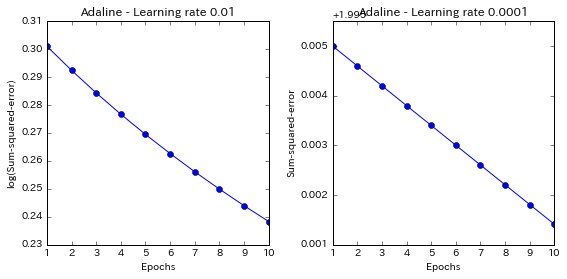

In [269]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.tight_layout()
# plt.savefig('./adaline_1.png', dpi=300)
plt.show()

### 本のコードを修正
何をやっているかわかるようにprintするようにした

In [270]:
class AdalineGD_2(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            print('-------',i+1,'start---------')
            print("net_inputは",net_input)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression, we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(X)
            print('outputは',output)
            errors = (y - output)
            print('errorsは',errors)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            print('w_は',self.w_)
            cost = (errors**2).sum() / 2.0
            print('costは',cost)
            self.cost_.append(cost)
            print('costは',self.cost_)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

In [ ]:
ada1 = AdalineGD_2(n_iter=10, eta=0.01).fit(X, y)

### 正規化

In [67]:
X_std = np.copy(X)

In [70]:
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [71]:
X_std

array([[-1, -1],
       [ 1, -1],
       [-1,  1],
       [ 1,  1]])

In [76]:
eta = 0.01 # 学習率
n_iter = 500 # トレーニングデータのトレーニング回数
w0, w1, w2 = 0.0, 0.0, 0.0 # 重みを 0 で初期化
w0_, w1_, w2_ = [], [], [] # 重みを格納するリスト
cost_ = [] # 誤差を格納するリスト

for epoch in range(n_iter): # トレーニング回数分トレーニングデータを反復
    # 総入力
    output = np.dot(X_std, np.array([w1, w2])) + w0
    # 誤差
    error = (y - output)
    # 重みの更新
    w0 += eta * error.sum()
    w1 += eta * np.dot(X_std.T, error)[0]
    w2 += eta * np.dot(X_std.T, error)[1]
    # 誤差の格納
    cost_.append(0.5 * np.sum(error**2))
    # 重みの格納
    w0_.append(w0)
    w1_.append(w1)
    w2_.append(w2)

## Irisもやってみる

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/' \
        'iris.data', header=None)

In [5]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

### githubのコード

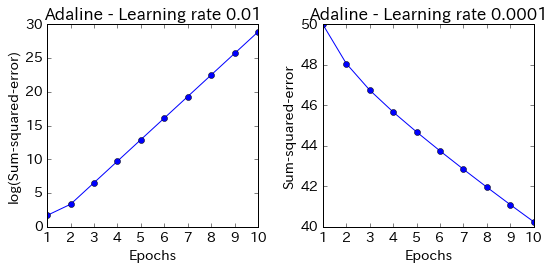

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ada_iris1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada_iris1.cost_) + 1), np.log10(ada_iris1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada_iris2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada_iris2.cost_) + 1), ada_iris2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.tight_layout()
# plt.savefig('./adaline_1.png', dpi=300)
plt.show()

### 正規化

In [10]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [11]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

/Users/purin/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/purin/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


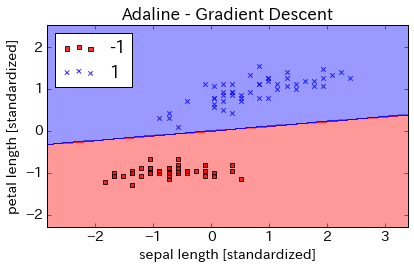

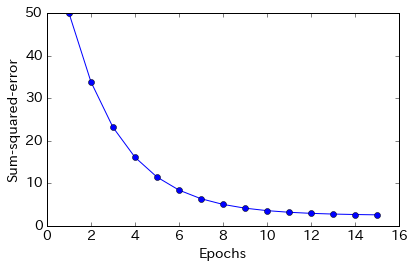

In [13]:
ada_nor = AdalineGD(n_iter=15, eta=0.01)
ada_nor.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_nor)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./adaline_2.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_nor.cost_) + 1), ada_nor.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('./adaline_3.png', dpi=300)
plt.show()

# その他
## 今回使う図の作成

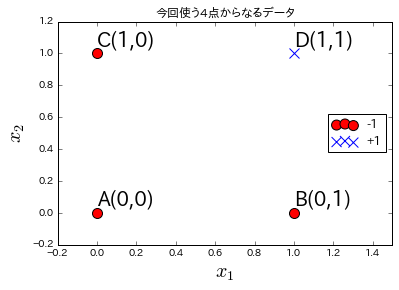

In [275]:
plt.scatter(X[:3,0], X[:3,1], c="red" , marker='o', label='-1', s = 100)
plt.scatter(X[3,0], X[3,1], c="blue" , marker='x', label='+1', s = 100)
plt.xlabel("$x_1$", fontsize = 20)
plt.ylabel("$x_2$", fontsize = 20)
plt.text(0, .05, 'A(0,0)', fontsize=20 )
plt.text(1, .05, 'B(0,1)', fontsize=20 )
plt.text(0, 1.05, 'C(1,0)', fontsize=20 )
plt.text(1, 1.05, 'D(1,1)', fontsize=20 )
plt.legend(loc = "right")
plt.xlim(-0.2, 1.5)
plt.title("今回使う4点からなるデータ");
plt.savefig("01_4point")

## スタイルシート修正

In [98]:
from IPython.core.display import HTML
HTML("""
<style>
div.text_cell_render { /* Customize text cells */
font-size:18px;
line-height:24px;
padding-left:10px;
padding-right:240px;
}
</style>
""")